In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from io import StringIO
%matplotlib notebook

In [2]:
with open('Data.txt') as file:
	lines = file.readlines()

lines = np.array(list(map(lambda x: x.strip("\n").strip().replace(' ', ', '), lines)))


<IPython.core.display.Javascript object>


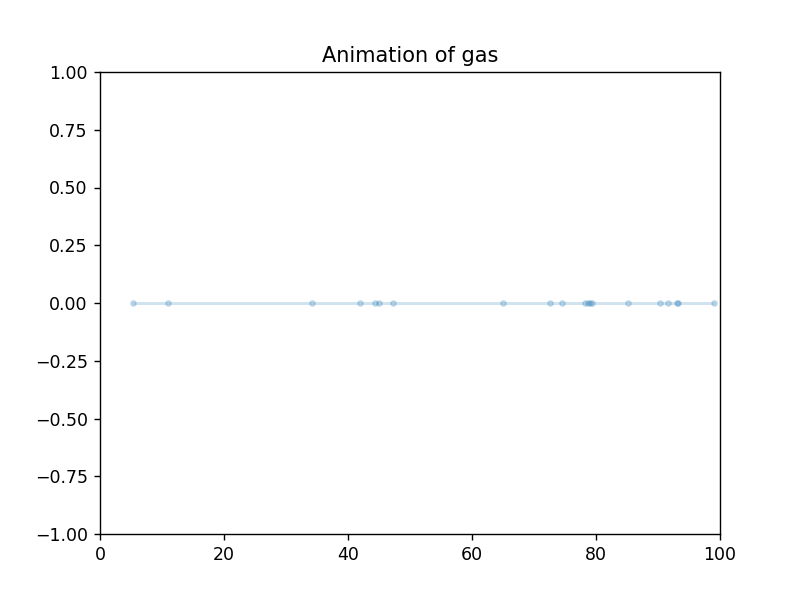

MovieWriter ffmpeg unavailable; using Pillow instead.


In [14]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], alpha=0.2, marker='.')
plt.title("Animation of gas")


def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 1)
    ln.set_data(xdata,ydata)
    return ln

def update(frame):
    xdata = np.genfromtxt(StringIO(lines[frame]), delimiter=', ')
    ydata = np.zeros(xdata.size)
    ln.set_data(xdata, ydata)
    return ln

anim = FuncAnimation(fig, update, frames=np.arange(0, lines.size),
                    init_func=init, blit=True, interval = 50, repeat = True)
# anim.save("animation_of_gas.gif")
plt.show()

In [23]:
start1, end1 = np.loadtxt("Vel1.txt")
start2, end2 = np.loadtxt("Vel2.txt")

<IPython.core.display.Javascript object>


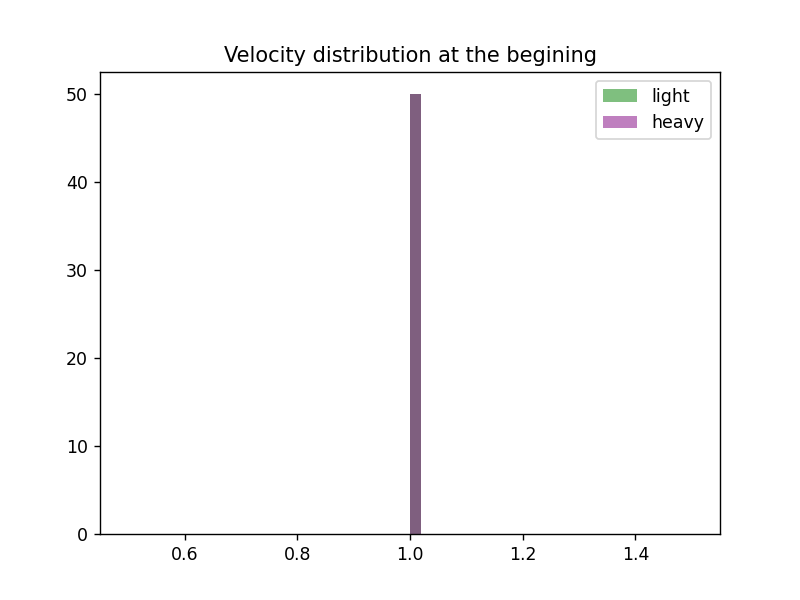

In [26]:


plt.hist(start1, bins = 50, density=True, facecolor='green', label = "light", alpha=0.5)
plt.hist(start2, bins = 50, density=True, facecolor='purple', label = "heavy", alpha=0.5)


plt.title('Velocity distribution at the begining')
plt.legend()
# plt.savefig("Start_velocity_distribution.png")
plt.show()

<IPython.core.display.Javascript object>


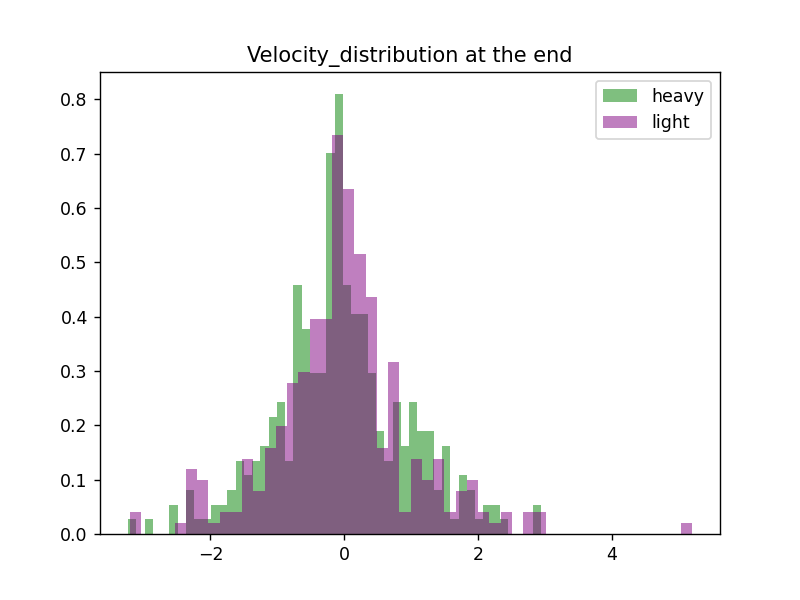

In [27]:


plt.hist(end1, bins = 50, density=True, facecolor='green', label = "heavy", alpha=0.5)
plt.hist(end2, bins = 50, density=True, facecolor='purple', label = "light", alpha=0.5)


plt.title('Velocity_distribution at the end')
plt.legend()
# plt.savefig("Last_velocity_distribution.png")
plt.show()

<IPython.core.display.Javascript object>


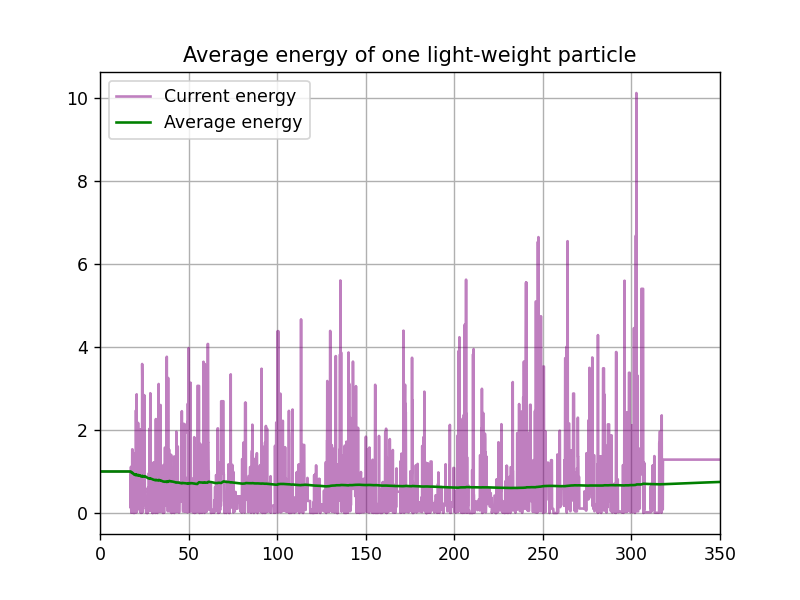

In [34]:
time, energy = np.loadtxt("Energy.txt").T

av_en = np.cumsum(energy)/np.arange(1, energy.size+1)
plt.grid(True)
plt.plot(time, energy, color="purple", label="Current energy", alpha=0.5)
plt.plot(time, av_en, color="green", label="Average energy")

plt.title("Average energy of one light-weight particle")
plt.legend()
plt.xlim((0,350))
# plt.savefig("Average_energy.png")
plt.show()

<IPython.core.display.Javascript object>


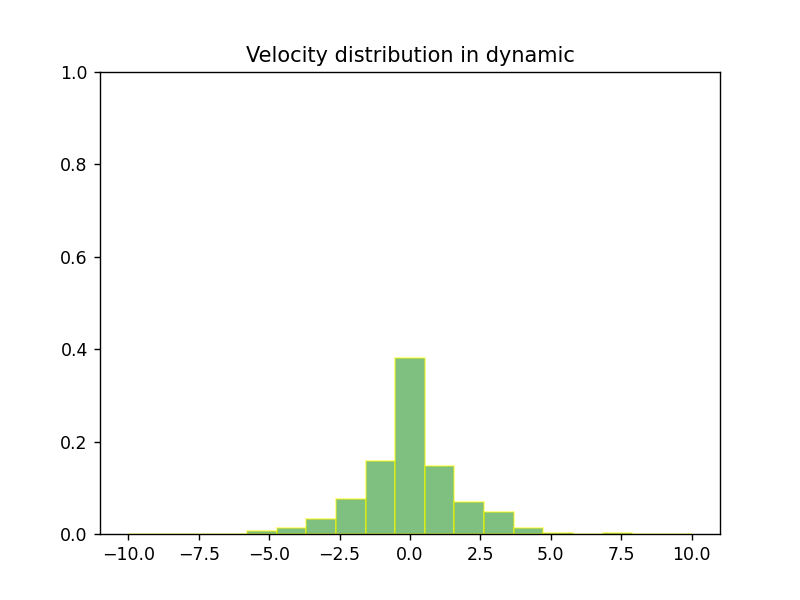

MovieWriter ffmpeg unavailable; using Pillow instead.


In [44]:
with open('Vel2.txt') as file:
	lines_vel_2 = file.readlines()

lines_vel_2 = np.array(list(map(lambda x: x.strip("\n").strip().replace(' ', ', '), lines_vel_2)))


HIST_BINS = np.linspace(-10, 10, 20)

data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

def prepare_animation(bar_container):

    def animate(frame_number):
        data = np.genfromtxt(StringIO(lines_vel_2[frame_number]), delimiter=', ')
        n, _ = np.histogram(data, HIST_BINS, density=True)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    
    return animate

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)

plt.title("Velocity distribution in dynamic")
ax.set_ylim(top=1)

ani = FuncAnimation(fig, prepare_animation(bar_container), interval=10,
                              repeat=False, blit=True)

ani.save("Velocity_distribition_animate.gif")
plt.show()